In [ ]:
addpath('/Users/paulina/Documents/MATLAB') 
addpath('/Users/paulina/Documents/MATLAB/psignifit-master')  

# Tactile Distance - Psychometric Analysis

To examine whether Thumb usage would lead to incorporating it into the body representation, we tested participants’ ability to discriminate between tactile distances applied over their wrist and forearm. During the experiment, participants were seated in an armchair, with their right elbow rested on an elevated foam padding with the forearm at full flexion and their left hand placed on a mouse connected to the experimental computer. The tactile stimuli comprised of custom-made callipers with acrylic pins fixed at distances of 50, 60 and 70 mm. In each trial, two distances were presented sequentially – one over the marked basepoint of the Thumb, one over the midpoint of the ventral side of the forearm (both in the same orientation). Participants were instructed to indicate which of the distances they perceived as larger. 

Here, we measured the proportion of responses in which the stimuli applied over the basepoint of the Thumb was judged as larger, as a function of the ratio of the length of the stimuli. We fit cumulative Gaussian curves to the data. We then calculated point of subjective equality (PSE) separately for each participant and session, as the ratio of stimuli at which the psychometric function crosses the 50% threshold.  

In [ ]:
subjects = {"SF1", "SF2", "SF3", "SF4", "SF5", "SF6", "SF7", "SF8", "SF11", ...
        "SF12", "SF13", "SF14", "SF15", "SF16", "SF17", "SF19", "SF21", "SF22", "SF23", "SF24"};
[pre, post] = importTDres(subjects)
save('TD-psych.mat', 'pre', 'post')

If all subjects are already in the TD-psych.mat, load the file

In [3]:
load('TD-psych.mat');

In [3]:
options = struct;
options.sigmoidName = 'norm';
options.expType = "YesNo";
options.stepN = [40, 40, 50, 20, 20];

plots = 1;
goodFit = 1;
stats = 1;

In [5]:
plotOptions.dataColor      = [0,105/255,170/255];
plotOptions.lineColor      = [0,105/255,170/255];          
plotOptions.lineWidth      = 2;                
plotOptions.xLabel         = 'Distance ratio'; 
plotOptions.yLabel         = 'Proportion of time RJ judged as longer';
plotOptions2.dataColor      = [200/255, 70/255, 0];
plotOptions2.lineColor      = [200/255, 70/255, 0]; 


s =

     1


s =

     2



Index exceeds matrix dimensions.



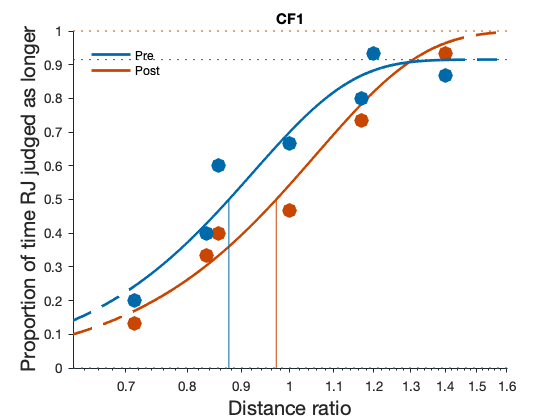

In [6]:
r2Pre = [];
r2Post = [];

for s = 1:length(pre)

s
dataPre = pre(:, :, s);
dataPost = post(:, :, s);

resultPre = psignifit(dataPre, options);
resultPost = psignifit(dataPost, options);

if plots == 1
    figure;
    h2 = plotPsych(resultPost, plotOptions2);
    hold on
    h1 = plotPsych(resultPre, plotOptions);
    legend([h1(1) h2(1)], 'Pre', 'Post', 'Location', 'northwest')
    legend('boxoff')
    title(['SF' num2str(s)])
end

if goodFit == 1
    ssrPre = sum((resultPre.data(:,2)./resultPre.data(:,3) - resultPre.psiHandle(resultPre.data(:,1))).^2);
    ssrPost = sum((resultPost.data(:,2)./resultPost.data(:,3) - resultPost.psiHandle(resultPost.data(:,1))).^2);

    sstPre = sum((resultPre.data(:,2)./resultPre.data(:,3) - mean(resultPre.data(:,2)./resultPre.data(:,3))).^2);
    sstPost = sum((resultPost.data(:,2)./resultPost.data(:,3) - mean(resultPost.data(:,2)./resultPost.data(:,3))).^2);

    r2Pre(s) = 1 - ssrPre/sstPre;
    r2Post(s) = 1 - ssrPost/sstPost;
    
    clear ssrPre ssrPost sstPre sstPost
end

if stats == 1
    threshPre(s,1) = getThreshold(resultPre, 0.25);
    threshPre(s,2) = getThreshold(resultPre, 0.5);
    try
        threshPre(s,3) = getThreshold(resultPre, 0.75);
    catch
    end
    
    threshPost(s,1) = getThreshold(resultPost, 0.25);
    threshPost(s,2) = getThreshold(resultPost, 0.5);
    try
        threshPost(s,3) = getThreshold(resultPost, 0.75);
    catch
    end
end
end